<a href="https://colab.research.google.com/github/ehdob-cid20/trabalho-pratico/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monta o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  Pré Processamento

## Instalação pacotes

In [ ]:
!pip install geopandas

     |████████████████████████████████| 962 kB 485 kB/s 
     |████████████████████████████████| 14.7 MB 9.0 MB/s 
     |████████████████████████████████| 1.0 MB 37.1 MB/s 
     |████████████████████████████████| 10.9 MB 21.9 MB/s 


## Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

## Importando o *dataset*

### Verifica se o dataset já foi importado para o google drive

Um script que verifica se o dataset já foi importado para o google drive. Caso ainda não tenha sido importado, ele faz o download do arquivo e extrai para a pasta informada na variável **dirName**.

Variáveis:

> **datasetFileName** é o nome do arquivo com extensão.

> **datsetUrl** é o endereço web onde o arquivo está disponível.

> **dirName** é o diretório do google drive onde o dataset será salvo.

Nota: O diretório de salvamento (*dirName*) precisa existir.


In [ ]:
import os

datasetFileName = 'dados-curso-completo.csv.tar.gz'
datsetUrl = 'http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz'
dirName = 'trabalho-pratico' # Este diretorio pode ser alterado se ja tiver o dataset no google drive.

if False == os.path.isfile('/content/drive/My Drive/' + dirName + '/' + datasetFileName[:-7]):
  if False == os.path.isdir('/content/drive'):
    print('Google driver não está montado!')
  elif False == os.path.isdir('/content/drive/My Drive/' +  dirName + '/'):
    print('Diretório ' + dirName + ' não encontrado.')
  elif False == os.path.isfile('/content/drive/My Drive/' + dirName + '/' + datasetFileName):
    !wget -O '/content/drive/My Drive/$dirName/$datasetFileName' '$datsetUrl' #TODO: handle download errors.
    !tar -C '/content/drive/My Drive/$dirName/{datasetFileName[:-7]}' -zxf '/content/drive/My Drive/$dirName/$datasetFileName' #TODO: handle extract errors.
  else:
    !tar -C '/content/drive/My Drive/$dirName/' -zxf '/content/drive/My Drive/$dirName/$datasetFileName' #TODO: handle extract errors.
else:
  print('O dataset ' + datasetFileName[:-7] + ' foi encontrado.')

O dataset dados-curso-completo.csv foi encontrado.


### Importando o *dataset* usando pandas

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/' + dirName + '/' + datasetFileName[:-7])

## Visualizando o *dataset* inicial (sem qualquer tratamento)

### Visualização geral do *dataset*



> Segue uma informação geral do dataset tento colunas, contagem e tipo



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 164.5+ MB




> Campos nulos do dataset. Em seguida segue uma visão geral de cada campo



In [ ]:
dataset.isnull().sum()

data                0
usuario            57
apelido             0
texto               0
retweet             0
seguidores          0
idioma              0
lugar         1584220
pais          1584225
sigla         1584230
latitude      1650105
longitude     1650105
hashtags            0
dtype: int64

In [ ]:
dataset.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


### Sumário para o campo *data*

**Resumo geral:**
> Possui 1.658.825 campos, onde 1.202.322 são únicos, 456.503 são duplicados e não há campos nulos.

> A data com maior frequência é '2020-04-15 21:00:00' e aparece 27 vezes.

> A data inicial é '2020-01-01 00:42:12' e a final '2020-07-28 17:19:44'.

In [ ]:
dataset.data.describe()

count                 1658825
unique                1202322
top       2020-04-15 21:00:00
freq                       27
Name: data, dtype: object

In [ ]:
datas_total = len(dataset.data)
datas_unicos = dataset.data.nunique()
datas_null = dataset.data.isnull().sum()
datas_duplicados = datas_total - datas_unicos - datas_null
datas_df = pd.DataFrame({
                  'datas': ['únicos', 'duplicados', 'vazio'] ,
                   'Contagem' : [datas_unicos, datas_duplicados, datas_null],
                   'Porcentagem' : [(datas_unicos/datas_total)*100, (datas_duplicados/datas_total)*100, (datas_null/datas_total)*100]})
datas_df

,datas,Contagem,Porcentagem
0,únicos,1202322,72.48034
1,duplicados,456503,27.51966
2,vazio,0,0.00000


In [ ]:
# Seleciona data e faz uma contagem do texto por data
data_df = dataset.groupby("data", as_index=False)["texto"].count()

# Atualiza o nome da coluna texto
data_df = data_df.rename(columns={"texto": "tweets"})

# Converte data para o tipo datetime
data_df['data'] = pd.to_datetime(data_df['data'])

# Coloca a data como indice
data_df = data_df.set_index('data')

# Agrupa por semana
data_semana = data_df.resample('W').sum()

# Agrupa por mes
data_mes = data_df.resample('M').sum()

# Converte as datas de semana para strings
#data_semana = data_semana.set_index(data_semana.index.strftime('%d %b, %Y'))

# Converte as datas de mes para strings
data_mes = data_mes.set_index(data_mes.index.strftime('%B'))

# Reseta o indice
data_semana = data_semana.reset_index()
data_mes = data_mes.reset_index()

In [ ]:
data_semana

,data,tweets
0,2020-01-05,317
1,2020-01-12,681
2,2020-01-19,948
3,2020-01-26,23195
4,2020-02-02,32832
5,2020-02-09,43395
6,2020-02-16,19281
7,2020-02-23,10931
8,2020-03-01,34983
9,2020-03-08,29309


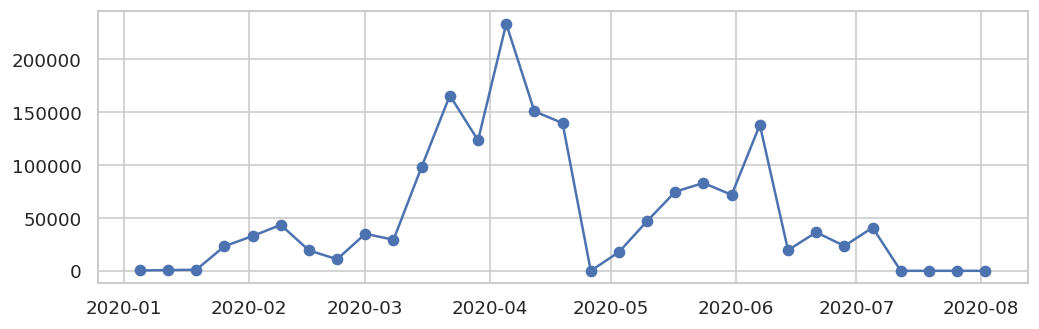

In [ ]:
plt.rcParams['figure.dpi'] = 120
f, ax = plt.subplots(figsize=(10, 3))
plt.plot_date(data_semana['data'], data_semana['tweets'], linestyle='solid')

In [ ]:
data_mes

,data,tweets
0,January,54555
1,February,109842
2,March,481657
3,April,470769
4,May,283986
5,June,258015
6,July,1


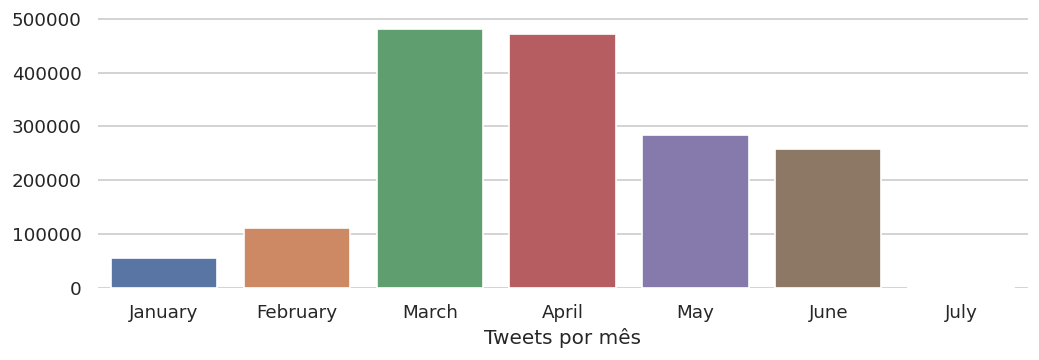

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 120
f, ax = plt.subplots(figsize=(10, 3))
sns.set_color_codes("pastel")
sns.barplot(x="data", y="tweets", data=data_mes)
ax.set(ylabel="", xlabel="Tweets por mês")
sns.despine(left=True, bottom=True)

### Sumário para o campo *usuario*

**Resumo geral:**
> Possui 1.658.825 campos, onde 632.601 são únicos, 1.026.167 são duplicados e 57 estão nulos.

> Usuário com maior frequência '.',  aparece 1624.

In [ ]:
dataset.usuario.describe()

count     1658768
unique     632601
top             .
freq         1624
Name: usuario, dtype: object

In [ ]:
usuarios_total = len(dataset.usuario)
usuarios_unicos = dataset.usuario.nunique()
usuarios_null = dataset.usuario.isnull().sum()
usuarios_duplicados = usuarios_total - usuarios_unicos - usuarios_null
usuarios_df = pd.DataFrame({
                  'Usuários': ['únicos', 'duplicados', 'vazio'] ,
                   'Contagem' : [usuarios_unicos, usuarios_duplicados, usuarios_null],
                   'Porcentagem' : [(usuarios_unicos/usuarios_total)*100, (usuarios_duplicados/usuarios_total)*100, (usuarios_null/usuarios_total)*100]})
usuarios_df

,Usuários,Contagem,Porcentagem
0,únicos,632601,38.135487
1,duplicados,1026167,61.861076
2,vazio,57,0.003436


Nota: O campo 'usuario' está trocado com o campo 'apelido', pois usuário é usado como um campo único, enquanto que um apelido pode ser usado por mais de um usuário.

### Sumário para o campo *apelido*

**Resumo geral:**
> Possui 1.658.825 campos, onde 774.516 são únicos e 0 estão nulos.

> Apelido com maior frequência 'Lusa_noticias',  aparece 1404.

In [ ]:
dataset.apelido.describe()

count           1658825
unique           774516
top       Lusa_noticias
freq               1404
Name: apelido, dtype: object

In [ ]:
apelidos_total = len(dataset.apelido)
apelidos_unicos = dataset.apelido.nunique()
apelidos_null = dataset.apelido.isnull().sum()
apelidos_duplicados = apelidos_total - apelidos_unicos - apelidos_null
apelidos_df = pd.DataFrame({
                  'Apelidos': ['únicos', 'duplicados', 'vazio'] ,
                   'Contagem' : [apelidos_unicos, apelidos_duplicados, apelidos_null],
                   'Porcentagem' : [(apelidos_unicos/apelidos_total)*100, (apelidos_duplicados/apelidos_total)*100, (apelidos_null/apelidos_total)*100]})
apelidos_df

,Apelidos,Contagem,Porcentagem
0,únicos,774516,46.690639
1,duplicados,884309,53.309361
2,vazio,0,0.000000


**Número de apelidos por País**

In [ ]:
# Agrupa todos os usuários por pais e conta quantos usuários tem de cada país.
apelido_pais = dataset.groupby("pais", as_index=False)["apelido"].count().sort_values("apelido", ascending=False)

# Calcula a porcentagem de participação
apelido_pais['apelido']= (apelido_pais['apelido']/apelido_pais['apelido'].sum())*100

# Divide o dataset apelido_pais em duas partes. 
# apelido_pais_grandes representa todos os países com pelo menos 0.5% de participação
# apelido_pais_pequenos representa todos os países com menos de 0.5% de participação
apelido_pais_grandes = apelido_pais[apelido_pais.apelido >= 0.5] .sort_values("apelido", ascending=False)
apelido_pais_pequenos = apelido_pais[apelido_pais.apelido < 0.5]

# Calcula a porcentagem de participação total de todos os países com menos de 0.5% de participação
apelidos_total_outros_paises = apelido_pais_pequenos['apelido'].sum()

# Reseta o indice do dataset apelido_pais_grandes para evitar warnings ao adicionar uma nova linha
apelido_pais_grandes = apelido_pais_grandes.reset_index(drop=True)

# Adiciona a nova linha 'Outros Países' ao dataset apelido_pais_grandes
apelido_pais_grandes.loc[len(apelido_pais_grandes.index)] = ['Outros Países',apelidos_total_outros_paises]

# Ordena o dataset apelido_pais_grandes do maior para o menor
apelido_pais_grandes = apelido_pais_grandes.sort_values("apelido", ascending=False).reset_index(drop=True)

# Exibe o dataset apelido_pais_grandes
apelido_pais_grandes = apelido_pais_grandes.rename(columns={"pais" : "Pais", "apelido" : "Presença de usuários (em %)"})
apelido_pais_grandes

,Pais,Presença de usuários (em %)
0,Brazil,90.143432
1,Outros Países,3.682306
2,Portugal,3.585791
3,United States,1.431635
4,Italy,0.648794
5,Spain,0.508043


**Gráfico de apelidos por país**

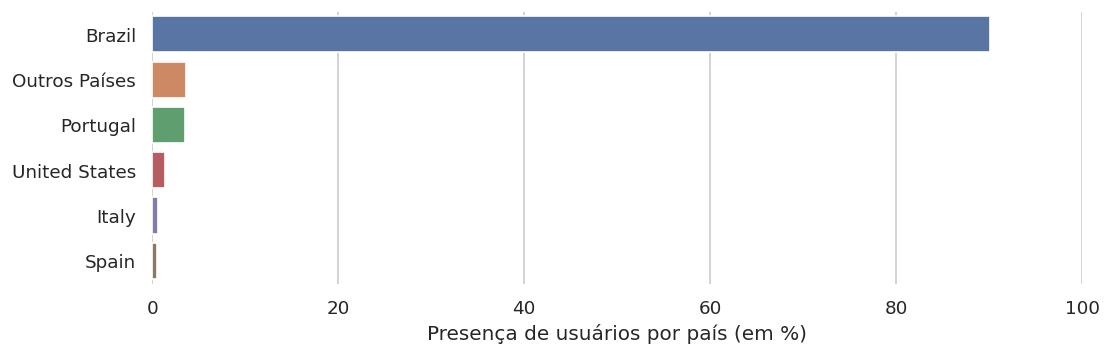

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 120
f, ax = plt.subplots(figsize=(10, 3))
sns.set_color_codes("pastel")
sns.barplot(x="Presença de usuários (em %)", y="Pais", data=apelido_pais_grandes)
ax.set(xlim=(0, 100), ylabel="", xlabel="Presença de usuários por país (em %)")
sns.despine(left=True, bottom=True)

Nota: A porcentagem de presença de usuários por país se refere ao real número de usuários no campo 'apelido'. A definição de 'usuario' e 'apelido' está trocada no dataset.

**Número de apelidos por Idioma**

In [ ]:
# Agrupa todos os usuários por idioma e conta quantos usuários tem de cada idioma.
apelido_idioma = dataset.groupby("idioma", as_index=False)["apelido"].count().sort_values("apelido", ascending=False)

# Calcula a porcentagem de participação
apelido_idioma['apelido']= (apelido_idioma['apelido']/apelido_idioma['apelido'].sum())*100

# Divide o dataset apelido_idioma em duas partes.
# apelido_idioma_grandes representa os cinco idiomas mais representativos do dataset
# apelido_idioma_pequenos representa todos os outros idiomas depois do quinto mais representativo
apelido_idioma_grandes = apelido_idioma[:5]
apelido_idioma_pequenos = apelido_idioma[5:]

# Calcula a porcentagem de participação total de todos os idiomas com depois do quinto mais representativo
apelidos_total_outros_idiomas = apelido_idioma_pequenos['apelido'].sum()

# Reseta o indice do dataset apelido_idioma_grandes para evitar warnings ao adicionar uma nova linha
apelido_idioma_grandes = apelido_idioma_grandes.reset_index(drop=True)

# Adiciona a nova linha 'Outros Idiomas' ao dataset apelido_idioma_grandes
apelido_idioma_grandes.loc[len(apelido_idioma_grandes.index)] = ['Outros Idiomas',apelidos_total_outros_idiomas]

# Ordena o dataset apelido_idioma_grandes do maior para o menor
apelido_idioma_grandes = apelido_idioma_grandes.sort_values("apelido", ascending=False).reset_index(drop=True)

# Exibe o dataset apelido_idioma_grandes
apelido_idioma_grandes = apelido_idioma_grandes.rename(columns={"idioma" : "Idioma", "apelido" : "Presença de usuários (em %)"})
apelido_idioma_grandes

,Idioma,Presença de usuários (em %)
0,pt,95.657830
1,en,1.446265
2,Outros Idiomas,1.304960
3,es,0.859343
4,it,0.390638
5,und,0.340964


Observações:

1. A porcentagem de presença de usuários por idioma se refere ao real número de usuários no campo 'apelido'. A definição de 'usuario' e 'apelido' está trocada no dataset.
2. O idioma '**und**' significa **undefined**, que em português seria "**não definido**". Os usuários no twitter podem escolher opções de privacidade para não compartilhar o idioma.

**Comparando apelidos por país com apelidos por idioma**

In [ ]:
apelido_pais_grandes

,Pais,Presença de usuários (em %)
0,Brazil,90.143432
1,Outros Países,3.682306
2,Portugal,3.585791
3,United States,1.431635
4,Italy,0.648794
5,Spain,0.508043


In [ ]:
apelido_idioma_grandes

,Idioma,Presença de usuários (em %)
0,pt,95.657830
1,en,1.446265
2,Outros Idiomas,1.304960
3,es,0.859343
4,it,0.390638
5,und,0.340964


Observações:

1. O Brasil é o país com o maior número de usuários, seguido por Portugal e ambos falam português. Porém se somarmos o número de usuários de Brasil e Portugal não dará o mesmo número de usuários por idioma em pt. Isso quer dizer que há mais países que falam português no dataset além de Brasil e Portugal.
2. O número de usuários na Itália é maior do que na Espanha. Entretanto, o idioma Espanhol tem mais do que o dobro de usuários que o Italiano. Isso é porque há mais países falam Espanhol do que Italiano.
3. Podemos observar que o número de usuários nos EUA é muito próximo do número de usuários que falam inglês, com isso poderíamos **erroneamente** considerar que a maioria dos usuários que estão nos EUA falam inglês. No entanto, podem haver usuários que estão no EUA e falam outro idioma. Os dois sub datasets apresentados são relacionados entre si apenas para o número de usuários. Para confirmar a hipótese de que a maioria dos usuários dos EUA falam inglẽs, seria necessário fazer uma relação entre país e idioma.

### Sumário para o campo *texto*

**Resuno geral:**
> Possui 1658825 campos, onde 1653599 são únicos


> Texto com maior frequência "covid 19? desculpa eu entendi convite para ficar de love", frequência do texto 120.

In [ ]:
dataset.texto.describe()

count                                               1658825
unique                                              1653599
top       covid 19? desculpa eu entendi convite pra fica...
freq                                                    120
Name: texto, dtype: object

**Texto duplicados:**


> Os texto que possuem maior duplicidade são:

*   covid 19? desculpa eu entendi convite para ficar de love
*   e vamos de pandemia
* Temos muitos infectados, mas não é de coronavírus, é maldade e inveja...
* e vamos de isolamento social

In [ ]:
duplicado  = dataset.texto.value_counts().reset_index().rename(columns={'index': 'Texto', 'texto': 'Total'})
duplicado

,Texto,Total
0,covid 19? desculpa eu entendi convite pra fica...,120
1,e vamos de pandemia,82
2,"Tem muitos infectados, mas não é de coronavíru...",70
3,e vamos de isolamento social,63
4,#Podcast - Tudo sobre o #Coronavirus aqui. Ouç...,50
...,...,...
1653594,#Repost @deboramarcier\n• • • • • •\nCOMUNICAM...,1
1653595,Estou esperando o dia em q o @jornalnacional v...,1
1653596,"Comprem álcool, máscaras, luvas e água sanitár...",1
1653597,Essa cena do coronavírus está a meter medo 😨,1


### Sumário para o campo *retweet*



> Média de retweets por idioma

In [ ]:
retweet_idioma = dataset.groupby('idioma').retweet.mean()

retweet_idioma.sort_values(ascending=False)

idioma
ko     71714.169118
th     11485.112360
en      8583.975574
und     2974.349364
in      2073.594937
ja      2048.657289
fr      1897.999726
da      1181.511111
cy       973.871795
es       853.611926
zh       754.588235
fi       620.909091
hi       589.490722
et       561.043210
tr       533.895035
te       496.117647
ro       393.066667
ar       367.008080
ht       306.419162
cs       275.305556
tl       259.064570
ur       253.055866
sd       239.166667
ta       214.750000
dv       205.000000
hu       199.307692
de       183.986150
lt       164.872093
uk       145.054054
sl       140.833333
vi       118.956522
eu       117.465517
my       108.000000
or       106.500000
fa        82.992248
pl        79.530534
sr        74.950000
kn        62.000000
ru        56.093525
el        46.882979
nl        43.788462
mr        43.000000
bn        30.500000
it        27.114969
gu        19.428571
ca        18.160769
pt        16.993245
ne        13.363636
sv        10.940476
ps         9.



> Somatoria de retweets por texto



In [ ]:
retweet_texto = dataset.groupby('texto').retweet.sum()

retweet_texto.sort_values(ascending=False)

texto
RT @BTS_twt: 하루종일 쉬는중!\n우리 아미들도 쉬는날엔 하루종일 쉽시다\n#BOTD #BTS_OF_THE_DAY https://t.co/1ImqLijZHa                                                     3630493
RT @OfficialMLK3: As my father explained during his lifetime, a riot is the language of the unheard.                                             3334793
RT @andymilonakis: Congratulations to the Astronauts that left Earth today. Good choice                                                          3219652
RT @BTS_twt: D-2 #AgustD https://t.co/2BPGGs8KbN                                                                                                 3072179
RT @OfficialMLK3: No justice, no peace. No justice, no peace. No justice, no peace.                                                              2878644
                                                                                                                                                  ...   
Isso é bobagem! A questão não é o Bozo, e sim tratar um continente chamado B



> Somatorio de retweets por pais



In [ ]:
retweet_pais = dataset.groupby('pais').retweet.sum()

retweet_pais.sort_values(ascending=False)

pais
Brazil           218346
Portugal          11874
United States      4501
France             2534
Italy               669
                  ...  
Lithuania             0
Luxembourg            0
Macau                 0
Malaysia              0
Andorra               0
Name: retweet, Length: 121, dtype: int64



> Usuários com maiores retweets



In [ ]:
retweet_usuario = dataset.groupby('usuario').retweet.max()

retweet_usuario.sort_values(ascending=False)

usuario
Maryy                         1139763
My cabbages!!                  989485
Tr1gger Mike                   901093
tweets not loading             850226
Lyndsay⁷                       842837
                               ...   
Thiago Vasconcelos                  0
Thiago Vasconcelos Pereira          0
Thiago Ventura 🇧🇷 🚘                 0
Thiago Viana Carraro                0
 ESTSOCCIENCIA                      0
Name: retweet, Length: 632601, dtype: int64



> Hashtags com maiores quantidade de retweets



In [ ]:
retweent_hashtags = dataset.groupby('hashtags').retweet.sum()

retweent_hashtags.sort_values(ascending=False)

hashtags
[]                                                                              287100210
['BOTD', 'BTS_OF_THE_DAY']                                                        8416915
['AgustD']                                                                        3072179
['0613FM_0515']                                                                   2664793
['JIMIN']                                                                         2504973
                                                                                  ...    
['bordercollie', 'covid_19', 'pastoreio', 'herdingdog']                                 0
['boraviajar', 'ferias', 'virus', 'Coronavirus', 'saude']                               0
['boratrabalhar']                                                                       0
['boratrabalhar', 'ficaemcasa', 'ficaemcasaporra', 'covid_19', 'quarentena']            0
['007SemTempoParaMorrer', 'Coronavirus']                                                0
N

### Sumário para o campo *seguidores*




> Existem 69575 usuários classificados como influeciadores, critério maior que 50000 seguidores. Representando 4,19% do dataset.

In [ ]:
influenciadores = dataset.query('seguidores > 50000 ')



> Apresentação geral dos seguidores com mais de 50000 seguidores



In [ ]:
influenciadores.sort_values(ascending=False, by='seguidores')

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
788393,2020-05-23 23:08:17,Donald J. Trump,realDonaldTrump,"RT @RyanAFournier: This morning, Joe Biden sai...",21369,84241250,en,NaN,NaN,NaN,NaN,NaN,[]
610962,2020-05-12 09:40:41,Reuters,Reuters,Japanese author Murakami to DJ 'Stay Home' rad...,46,22098307,en,NaN,NaN,NaN,NaN,NaN,[]
113733,2020-04-16 15:40:07,CNN en Español,CNNEE,FDA pide a recuperados de covid-19 donar sangr...,139,18878720,pt,NaN,NaN,NaN,NaN,NaN,[]
1491980,2020-04-07 21:30:08,CNN en Español,CNNEE,Ronda global de noticias de coronavirus este 7...,22,18875851,pt,NaN,NaN,NaN,NaN,NaN,[]
1519974,2020-02-26 03:28:52,Danilo Gentili,DaniloGentili,@Fabiodedao Eu levarei a nova schin que aí vai...,0,17244348,pt,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440766,2020-05-28 21:36:54,Patriotas,PATRIOTASBR38,Estados governados por rivais de Bolsonaro têm...,709,50007,pt,NaN,NaN,NaN,NaN,NaN,[]
1202168,2020-03-24 20:43:38,Paulo Mathias,paulomathias,A verdade sobre o coronavírus é que ele dura n...,19,50006,pt,NaN,NaN,NaN,NaN,NaN,[]
18865,2020-03-31 19:41:31,Revista Oeste,revistaoeste,Israel está trabalhando em conjunto com a Auto...,26,50006,pt,NaN,NaN,NaN,NaN,NaN,[]
80604,2020-03-19 23:43:02,Cavalinho do Cruzeiro,cavalinhodocec,Já sei a solução para resolver o problema de r...,79,50003,pt,NaN,NaN,NaN,NaN,NaN,[]




> Segue abaixo um top 20 dos usuarios que possuem mais seguidores, considerando os campos usuário e seguidores do dataframe `influenciadores`



In [ ]:
top = dataset.groupby('usuario').seguidores.sum().reset_index().rename(columns={'index': 'usuario', 'seguidores': 'seguidores'})

top_20 = top.sort_values(ascending=False, by='seguidores')[:20]



> Apresentação dos 20 maiores influenciadores do dataset:





**Formato Tabela**



In [ ]:
top_20

,usuario,seguidores
152536,G1,5409345836
147289,Folha de S.Paulo,4332229009
203032,Jornal O Globo,3019264535
130513,Estadão,2821184577
402816,VEJA,2246152190
326832,Portal R7.com,2161235916
400361,UOL Notícias,1894098527
46708,BBC News Brasil,917150525
468384,exame,892725138
164159,GloboNews,787834472


**Formato gráfico**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0, flags=flags)


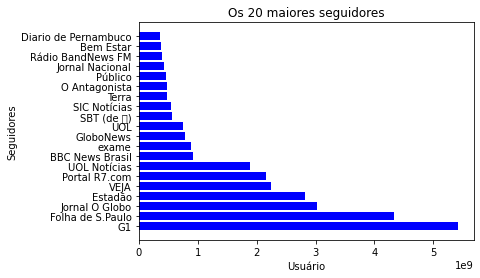

In [ ]:
plt.barh(top_20.usuario, top_20.seguidores, color='blue')
plt.ylabel('Seguidores')
plt.xlabel('Usuário')
plt.title('Os 20 maiores seguidores')
plt.show()

### Sumário para o campo *idioma*

**Resumo geral:**



> No campo idioma temos 59 registros únicos, onde o maior frequente é "pt" com 1586796



In [ ]:
dataset.idioma.describe()

count     1658825
unique         59
top            pt
freq      1586796
Name: idioma, dtype: object



> Contagem de registro por pais



In [ ]:
dataset.idioma.value_counts()

pt     1586796
en       23991
es       14255
it        6480
und       5656
ar        4579
fr        3656
ca        2600
tr        2296
ja        1955
in         948
th         890
tl         604
ko         544
hi         485
ru         417
de         361
pl         262
fa         258
nl         208
ur         179
ht         167
et         162
eu         116
el          94
lt          86
sv          84
cs          72
no          56
zh          51
ro          45
da          45
fi          44
cy          39
uk          37
lv          36
iw          36
ta          32
hu          26
vi          23
is          21
sr          20
sl          18
te          17
sd          12
ne          11
mr          10
bn          10
gu           7
ps           6
ckb          5
am           4
bg           4
ml           2
si           2
or           2
kn           1
my           1
dv           1
Name: idioma, dtype: int64



> Contagem de usuarios por pais



In [ ]:
dataset.groupby('idioma').usuario.count()

idioma
am           4
ar        4578
bg           4
bn          10
ca        2600
ckb          5
cs          72
cy          39
da          45
de         361
dv           1
el          94
en       23991
es       14255
et         162
eu         116
fa         258
fi          44
fr        3655
gu           7
hi         485
ht         167
hu          26
in         948
is          21
it        6480
iw          36
ja        1955
kn           1
ko         544
lt          86
lv          36
ml           2
mr          10
my           1
ne          11
nl         208
no          56
or           2
pl         262
ps           6
pt     1586743
ro          45
ru         417
sd          12
si           2
sl          18
sr          20
sv          84
ta          32
te          17
th         889
tl         604
tr        2296
uk          37
und       5655
ur         179
vi          23
zh          51
Name: usuario, dtype: int64

### Sumário para o campo *pais*

**Resumo geral:**
> Possui 1.658.825 campos, onde 121 são únicos e 1.584.225 estão nulos.

> País com maior frequência 'Brazil',  aparece 67.247 vezes.

In [ ]:
dataset.pais.describe()

count      74600
unique       121
top       Brazil
freq       67247
Name: pais, dtype: object

In [ ]:
pais_total = len(dataset.pais)
pais_unicos = dataset.pais.nunique()
pais_null = dataset.pais.isnull().sum()
pais_duplicados = pais_total - pais_unicos - pais_null
pais_preenchido = pais_duplicados + pais_unicos
pais_df = pd.DataFrame({
                  'pais': ['únicos', 'duplicados', 'vazio', 'preenchidos'] ,
                   'Contagem' : [pais_unicos, pais_duplicados, pais_null, pais_preenchido],
                   'Porcentagem' : [(pais_unicos/pais_total)*100, (pais_duplicados/pais_total)*100, (pais_null/pais_total)*100, (pais_preenchido/pais_total)*100]})
pais_df

,pais,Contagem,Porcentagem
0,únicos,121,0.007294
1,duplicados,74479,4.489865
2,vazio,1584225,95.502841
3,preenchidos,74600,4.497159


### Sumário para o campo *sigla*

**Resumo geral:**
> Possui 1.658.825 campos, onde 120 são únicos e 1.584.230 estão nulos.

> Sigla com maior frequência 'BR',  aparece 67.247 vezes.

In [ ]:
dataset.sigla.describe()

count     74595
unique      120
top          BR
freq      67247
Name: sigla, dtype: object

In [ ]:
sigla_total = len(dataset.sigla)
sigla_unicos = dataset.sigla.nunique()
sigla_null = dataset.sigla.isnull().sum()
sigla_duplicados = sigla_total - sigla_unicos - sigla_null
sigla_preenchido = sigla_duplicados + sigla_unicos
sigla_df = pd.DataFrame({
                  'sigla': ['únicos', 'duplicados', 'vazio', 'preenchidos'] ,
                   'Contagem' : [sigla_unicos, sigla_duplicados, sigla_null, sigla_preenchido],
                   'Porcentagem' : [(sigla_unicos/sigla_total)*100, (sigla_duplicados/sigla_total)*100, (sigla_null/sigla_total)*100, (sigla_preenchido/sigla_total)*100]})
sigla_df

,sigla,Contagem,Porcentagem
0,únicos,120,0.007234
1,duplicados,74475,4.489624
2,vazio,1584230,95.503142
3,preenchidos,74595,4.496858


### Sumário para os campos *latitude* e *longitude*

**Resumo geral campo latitude:**

In [ ]:
dataset.latitude.describe()

count    8720.000000
mean      -40.237583
std        20.808494
min      -123.120400
25%       -47.864334
50%       -43.955615
75%       -38.453198
max       174.789310
Name: latitude, dtype: float64

**Resumo geral lagitude:**

In [ ]:
dataset.longitude.describe()

count    8720.000000
mean      -11.117100
std        19.169105
min       -37.818769
25%       -23.305300
50%       -19.624400
75%        -7.120700
max        58.257776
Name: longitude, dtype: float64

Mapa com apresentação dos lugares dos tweets dos usuarios

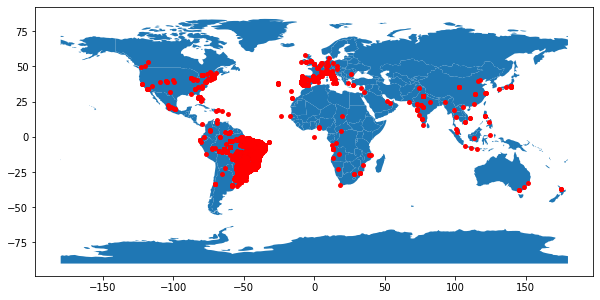

In [ ]:
geometry = [Point(xy) for xy in zip(dataset['latitude'], dataset['longitude'])]
gdf = GeoDataFrame(dataset, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);


### Sumario para o campo *hashtags*

**Resumo geral:**

> Este campo possui 63838 campos únicos, a informação mais frenquente é o "[ ]"



In [ ]:
dataset.hashtags.describe()

count     1658825
unique      63838
top            []
freq      1495569
Name: hashtags, dtype: object

**Hashtags em destaque:**



> Segue abaixo as 10 hashtags mais usadas:



In [ ]:
dataset.hashtags.value_counts()[:10]

[]                 1495569
['COVID19']           9951
['coronavirus']       6658
['Coronavirus']       3294
['coronavírus']       2890
['Covid_19']          2485
['covid19']           2403
['Covid19']           2367
['Coronavírus']       1566
['Repost']             831
Name: hashtags, dtype: int64



> Uma apresentação das hashtags mais frequentes acima e menos frequentes abaixo.



In [ ]:
dataset.hashtags.value_counts()

[]                                                             1495569
['COVID19']                                                       9951
['coronavirus']                                                   6658
['Coronavirus']                                                   3294
['coronavírus']                                                   2890
                                                                ...   
['Darwin', 'Covid_19', 'coronavirus', 'quarentena']                  1
['Sodar']                                                            1
['Covid_19', 'okullartatilolsun']                                    1
['quarentena', 'isolamentosocial', 'Isolation']                      1
['Coronavirus', 'COVID19', 'Cannabis', 'Maconha', 'Canada']          1
Name: hashtags, Length: 63838, dtype: int64

## Aplicando tratamento ao *dataset*

In [ ]:
# Trocando o nome  das colunas apelido e usuario
dataset_com_tratamento = dataset.rename(columns={"apelido": "usuario", "usuario" : "apelido"})

# Removendo linhas duplicadas
dataset_com_tratamento = dataset_com_tratamento[dataset_com_tratamento.duplicated() == False]

# Seleciona apenas tweets com o idioma em portugues
dataset_com_tratamento = dataset_com_tratamento[dataset_com_tratamento.idioma == 'pt']

## Criando o *dataset* DuvidasDB

## Dividindo o dataset em *Training set* e *Test set*